In [12]:
import numpy as np
import matplotlib.pyplot as plt
from model import paddings
import os
from PIL import Image

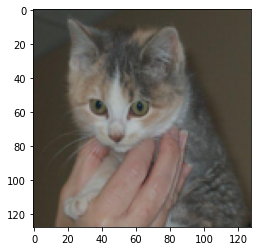

In [13]:
filepath = 'datasets\\catsanddogs\\Petimages\\Cat'
image_rgb = Image.open(filepath + '\\' + os.listdir(filepath)[7])
image_resized = image_rgb.resize((128, 128))
image = np.asarray(image_resized)

plt.imshow(image)

In [14]:
image.shape

(128, 128, 3)

In [15]:
kernel_shape = (3, 3, 3)
kernel = np.array([
    [[1], [0], [-1]],
    [[2], [0], [-2]],
    [[1], [0], [-1]]]) * np.ones((1, 1, kernel_shape[2]))

In [16]:
image_p = paddings.Same(image, kernel_shape)
image_p.shape

(130, 130, 3)

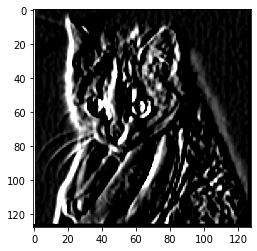

In [19]:
stride = 1
kernel_overhang = int((kernel.shape[0] - 1) / 2)
featuremap_shape = (image.shape[0], image.shape[1], 1)
feature_map = np.zeros(featuremap_shape)

# convolution
y0 = yc = 0
for y in range(kernel_shape[0], image.shape[0] + 1, stride):
    x0 = xc = 0
    for x in range(kernel_shape[1], image.shape[1] + 1, stride):
        arr = image_p[y0:y, x0:x, :]
        feature_map[yc, xc, 0] = np.sum(arr * np.fliplr(kernel))
        x0 += stride
        xc += 1
    y0 += stride
    yc += 1

plt.imshow(feature_map, cmap='gray', vmin=0, vmax=255)